In [1]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("Titanic_train1.csv")
test_df = pd.read_csv("Titanic_test1.csv")

train_info = train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
#EDA

In [3]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


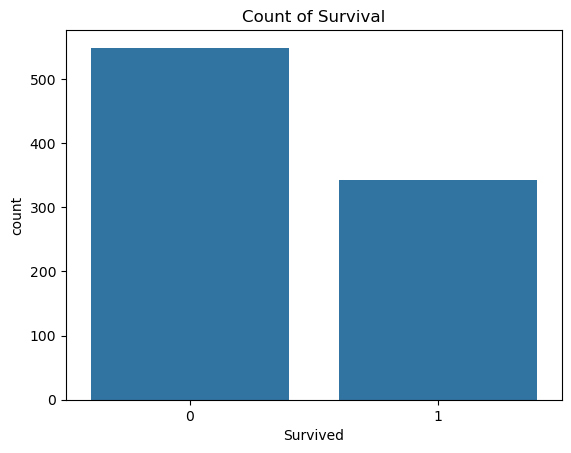

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Survived', data=train_df)
plt.title('Count of Survival')
plt.show()

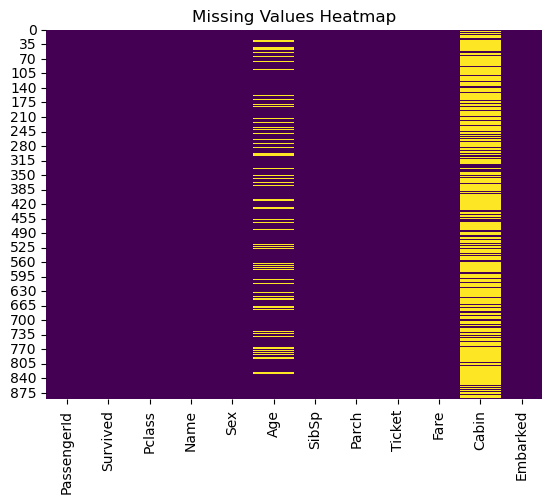

In [8]:
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

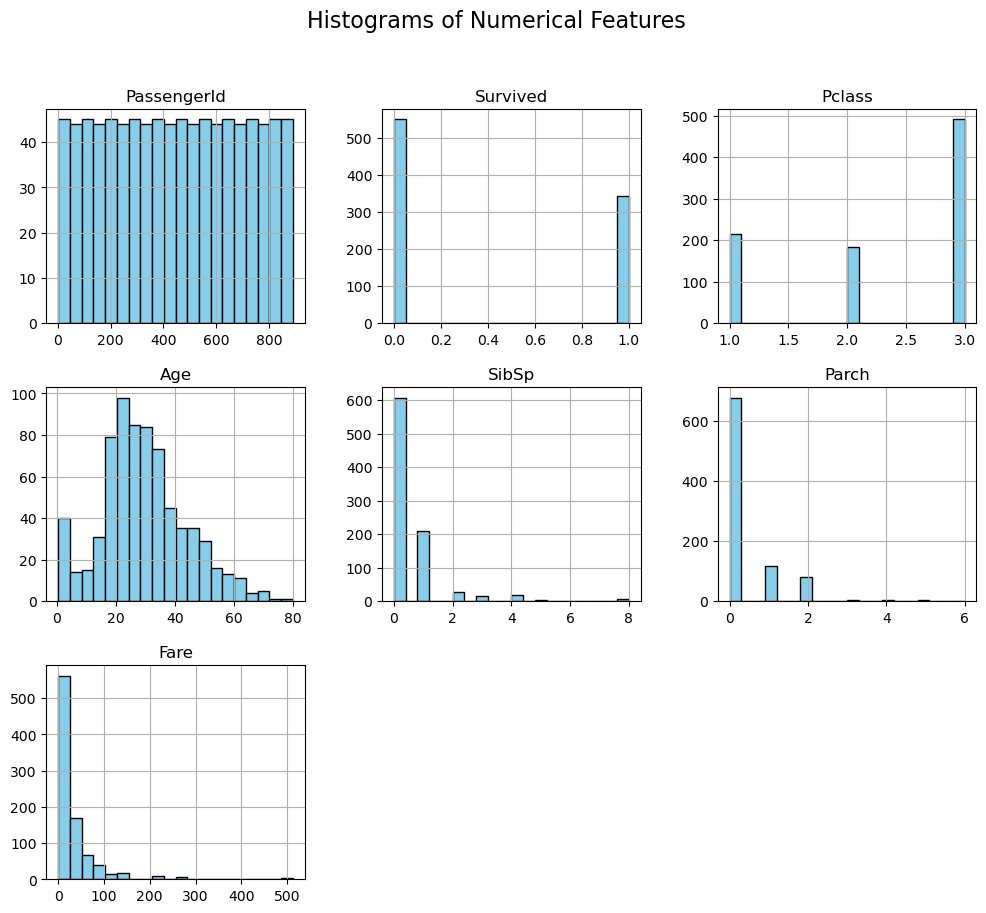

In [9]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df[numerical_cols].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

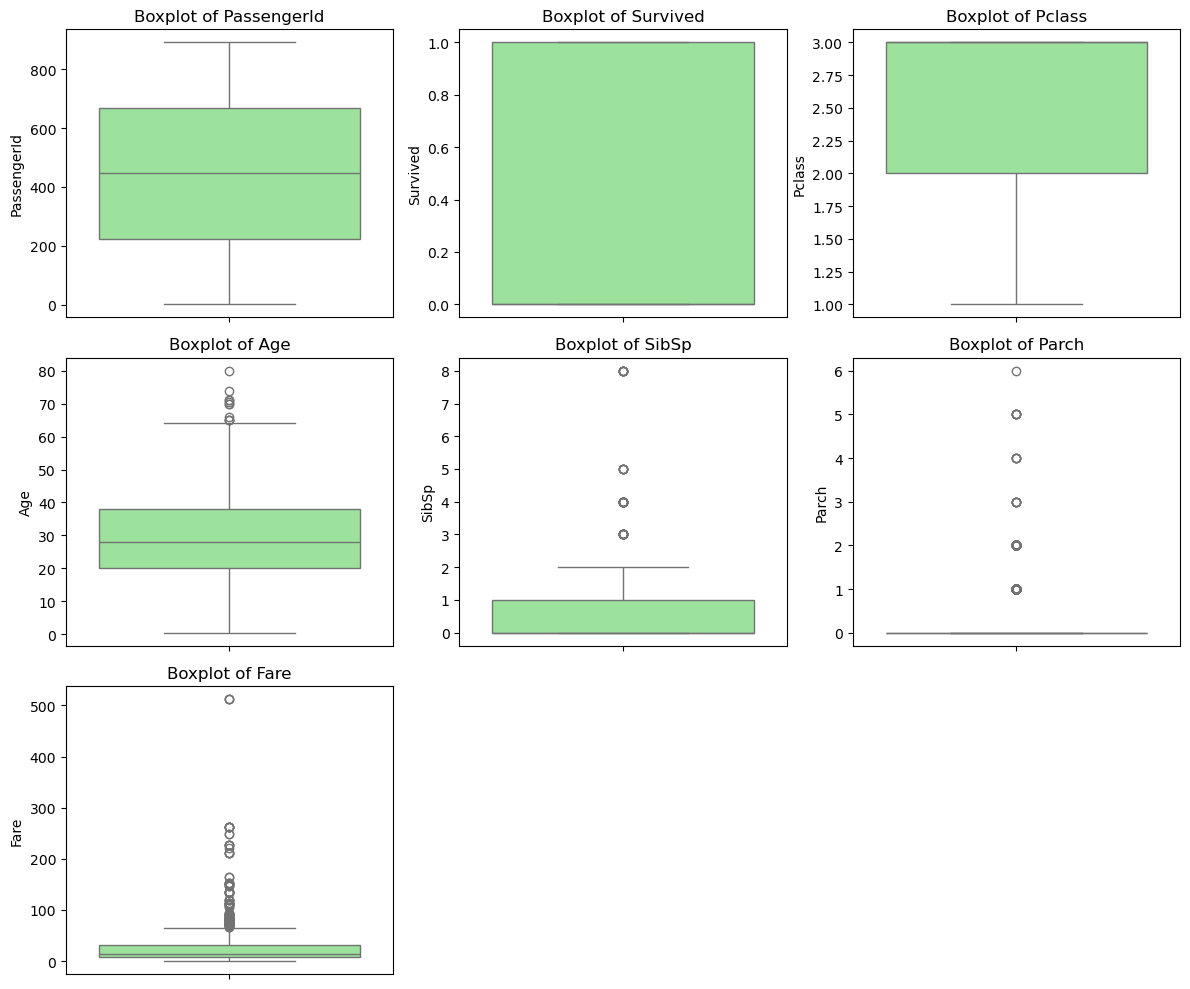

In [10]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train_df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

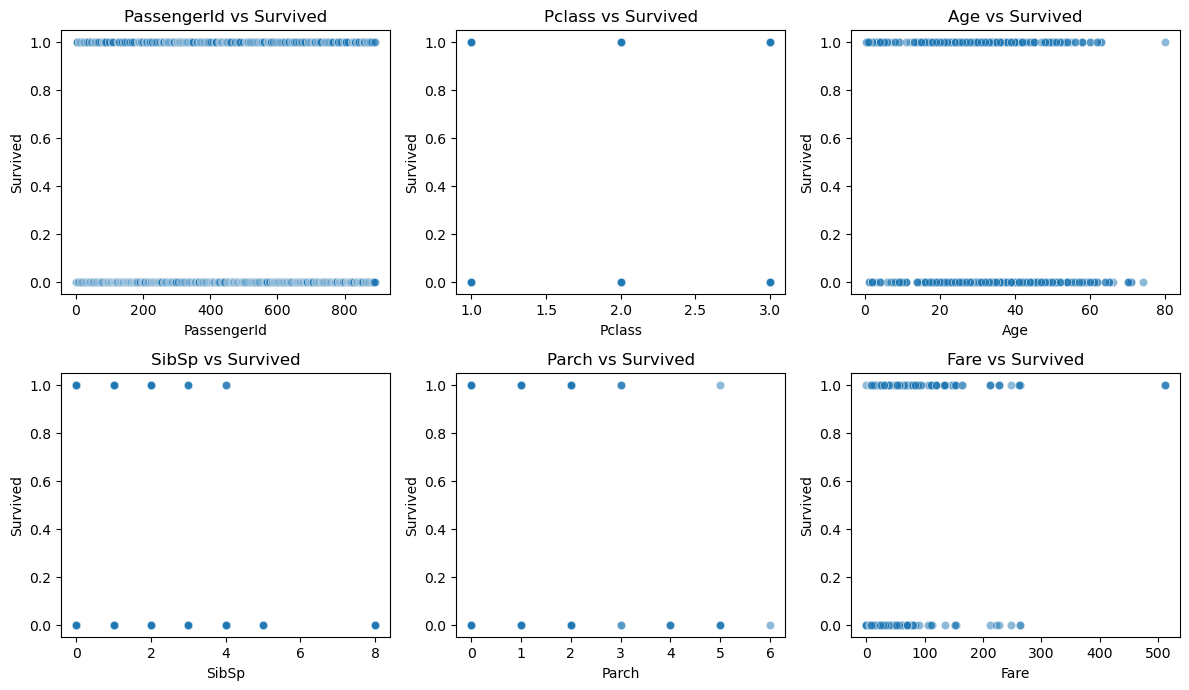

In [11]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('Survived')

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=train_df[col], y=train_df['Survived'], alpha=0.5)
    plt.title(f'{col} vs Survived')
plt.tight_layout()
plt.show()


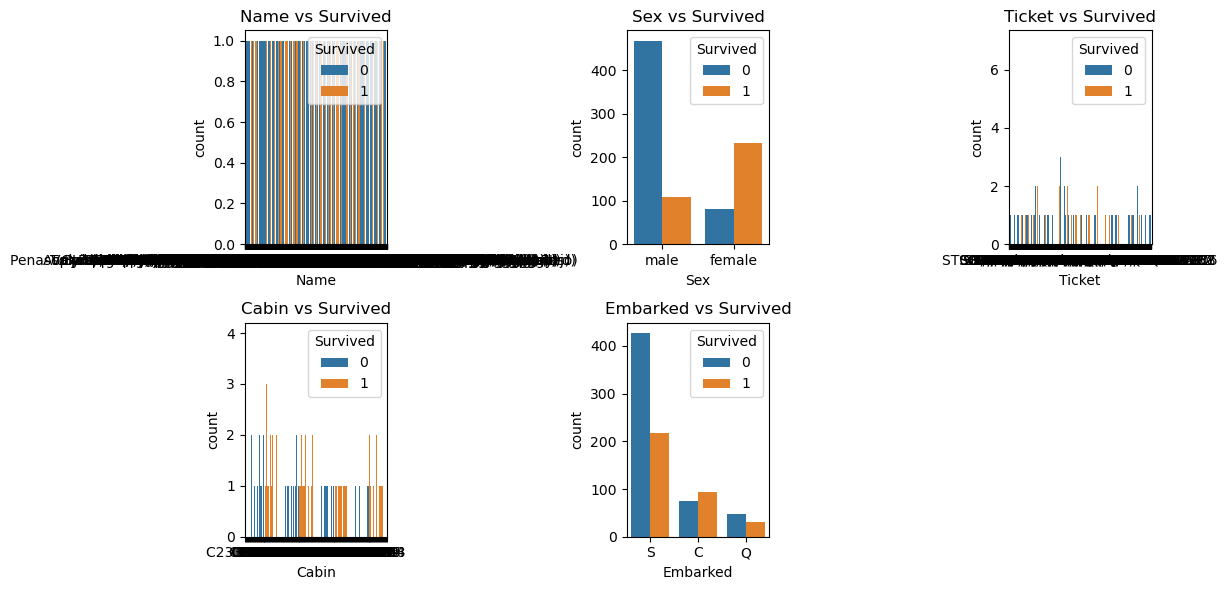

In [12]:
categorical_cols = train_df.select_dtypes(include=['object']).columns

plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='Survived', data=train_df)
    plt.title(f'{col} vs Survived')
plt.tight_layout()
plt.show()

In [ ]:
#Histograms
#Show the frequency distribution of numerical features (like Age, Fare, etc.).
#Helps to see skewness, range, and common values.

#Box Plots
#Visualize median, quartiles, and outliers.
#Outliers appear as points outside the whiskers.

#Libraries used:
#Matplotlib for plotting grids of histograms.
#Seaborn for clear, aesthetic box plots

In [13]:
#Data Preprocessing

In [14]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols_test = [col for col in numerical_cols if col in test_df.columns]  # exclude Survived
for col in numerical_cols:
    median_value = train_df[col].median()
    train_df[col] = train_df[col].fillna(median_value)

for col in numerical_cols_test:
    median_value = train_df[col].median()
    test_df[col] = test_df[col].fillna(median_value)
    categorical_cols = train_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    mode_value = train_df[col].mode()[0]
    train_df[col] = train_df[col].fillna(mode_value)
    if col in test_df.columns:   # check if column exists in test
        test_df[col] = test_df[col].fillna(mode_value)
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = train_df.select_dtypes(include=['object']).columns

train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)
test_df = test_df.reindex(columns=train_df.columns.drop('Survived'), fill_value=0)
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [17]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,0,0,0,...,False,0,False,False,0,False,False,0,True,False
1,893,3,47.0,1,0,7.0000,0,0,0,0,...,False,0,False,False,0,False,False,0,False,True
2,894,2,62.0,0,0,9.6875,0,0,0,0,...,False,0,False,False,0,False,False,0,True,False
3,895,3,27.0,0,0,8.6625,0,0,0,0,...,False,0,False,False,0,False,False,0,False,True
4,896,3,22.0,1,1,12.2875,0,0,0,0,...,False,0,False,False,0,False,False,0,False,True


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols_for_scaling = train_df.select_dtypes(include=['int64', 'float64']).columns.drop('Survived')
train_df[num_cols_for_scaling] = scaler.fit_transform(train_df[num_cols_for_scaling])
test_df[num_cols_for_scaling] = scaler.transform(test_df[num_cols_for_scaling])
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,-1.730108,0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-1.726220,1,-1.566107,0.663861,0.432793,-0.473674,0.786845,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-1.722332,1,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-1.718444,1,-1.566107,0.433312,0.432793,-0.473674,0.420730,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,-1.714556,0,0.827377,0.433312,-0.474545,-0.473674,-0.486337,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [19]:
test_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1.733996,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0,0,0,0,...,False,0,False,False,0,False,False,0,True,False
1,1.737884,0.827377,1.355510,0.432793,-0.473674,-0.507479,0,0,0,0,...,False,0,False,False,0,False,False,0,False,True
2,1.741772,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0,0,0,0,...,False,0,False,False,0,False,False,0,True,False
3,1.745659,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0,0,0,0,...,False,0,False,False,0,False,False,0,False,True
4,1.749547,0.827377,-0.565736,0.432793,0.767630,-0.401017,0,0,0,0,...,False,0,False,False,0,False,False,0,False,True


In [20]:
#Building Predictive Models

In [21]:
from sklearn.model_selection import train_test_split
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape

(712, 1725)

In [22]:
X_test.shape

(179, 1725)

In [23]:
y_train.shape

(712,)

In [24]:
y_test.shape

(179,)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

Model Evaluation Metrics:
Accuracy:  0.7821
Precision: 0.7500
Recall:    0.6522
F1-score:  0.6977


In [26]:
confusion_matrix(y_test, y_pred)

array([[95, 15],
       [24, 45]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       110
           1       0.75      0.65      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



In [28]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import re
import warnings
import os

warnings.filterwarnings("ignore")
os.environ["LOKY_MAX_CPU_COUNT"] = "4"   # optional: prevents CPU core warning

X_train.columns = [re.sub('[^A-Za-z0-9_]+', '', c) for c in X_train.columns]
X_test.columns = [re.sub('[^A-Za-z0-9_]+', '', c) for c in X_test.columns]

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train, y_train)

lgb_model = LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    random_state=42,
    verbose=-1
)
lgb_model.fit(X_train, y_train)

def evaluate(y_true, y_pred, model_name):
    print(f"\n--- {model_name} Evaluation ---")
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:   ", recall_score(y_true, y_pred))
    print("F1-score: ", f1_score(y_true, y_pred))

y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)

evaluate(y_test, y_pred_xgb, "XGBoost")
evaluate(y_test, y_pred_lgb, "LightGBM")



--- XGBoost Evaluation ---
Accuracy:  0.7653631284916201
Precision: 0.7213114754098361
Recall:    0.6376811594202898
F1-score:  0.676923076923077

--- LightGBM Evaluation ---
Accuracy:  0.776536312849162
Precision: 0.7377049180327869
Recall:    0.6521739130434783
F1-score:  0.6923076923076923


In [34]:
from sklearn.model_selection import GridSearchCV

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=xgb_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

lgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

lgb_grid = GridSearchCV(
    estimator=LGBMClassifier(random_state=42, verbose=-1),
    param_grid=lgb_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
lgb_grid.fit(X_train, y_train)
best_lgb = lgb_grid.best_estimator_

In [ ]:
#Comparative Analysis

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_lgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_lgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_lgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_lgb)
    ]
})

print("=== Comparative Analysis of Models ===")
print(results)

=== Comparative Analysis of Models ===
      Model  Accuracy  Precision    Recall  F1-Score
0   XGBoost  0.765363   0.721311  0.637681  0.676923
1  LightGBM  0.776536   0.737705  0.652174  0.692308


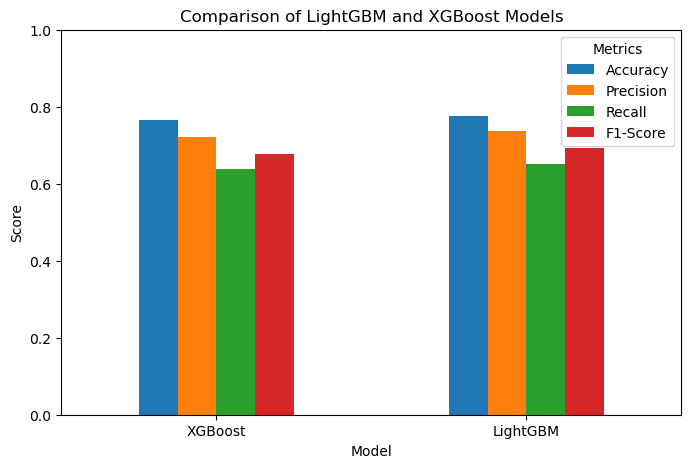

In [36]:
results.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar',
    figsize=(8, 5),
    rot=0
)

plt.title("Comparison of LightGBM and XGBoost Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metrics")
plt.show()

In [37]:
print("\nInterpretation:")
print("- Higher accuracy indicates better overall prediction capability.")
print("- Precision shows how many predicted positives were actually correct.")
print("- Recall indicates how well the model captures all positive cases.")
print("- F1-score balances Precision and Recall.")
print("\nChoose the model that aligns best with your project goal (e.g., high Recall for medical, high Precision for fraud detection).")


Interpretation:
- Higher accuracy indicates better overall prediction capability.
- Precision shows how many predicted positives were actually correct.
- Recall indicates how well the model captures all positive cases.
- F1-score balances Precision and Recall.

Choose the model that aligns best with your project goal (e.g., high Recall for medical, high Precision for fraud detection).


In [38]:
#Submission Requirements
#I hope I Have satisfied all the Requirements. 